In [1]:
%pylab inline
from astropy.stats import sigma_clip
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [2]:
t15 = Table(Table.read('bassqa2015.fits',hdu='BIASCHK'),masked=True)
t16 = Table(Table.read('bassqa2016.fits',hdu='BIASCHK'),masked=True)
s15 = Table(Table.read('bassqa2015.fits',hdu='OSCANCHK'),masked=True)
s16 = Table(Table.read('bassqa2016.fits',hdu='OSCANCHK'),masked=True)
b15 = np.where(np.char.rstrip(s15['imType'])=='zero')[0]
o15 = np.where(np.char.rstrip(s15['imType'])=='object')[0]
b16 = np.where(np.char.rstrip(s16['imType'])=='zero')[0]
o16 = np.where(np.char.rstrip(s16['imType'])=='object')[0]
for t in [t15,t16,s15,s16]:
    for c in t.colnames:
        if c.startswith('slice'):
            t[c].mask = t[c]==0
print len(t15),len(s15),len(b15),len(o15)
print len(t16),len(s16),len(b16),len(o16)

976 9837 1000 8837
1771 14298 1791 12507


## Bias Ramps

The "bias ramps" were large gradients along detector columns in 2015 data, particularly in CCD3 (and also CCD2 to some degree). The gradients could be as large as 50 ADU in dynamic range. I searched for these gradients in bias frames taken in 2015 and 2016 by taking a slice along rows near the center of each amplifier image, collapsing along columns with a median to get an average 1D row profile, and then smoothing that profile further with a gaussian filter. The 'sliceRangeAdu' is the difference between the maximum and minimum of this smoothed profile.

The improvement from 2015 to 2016 is clear.

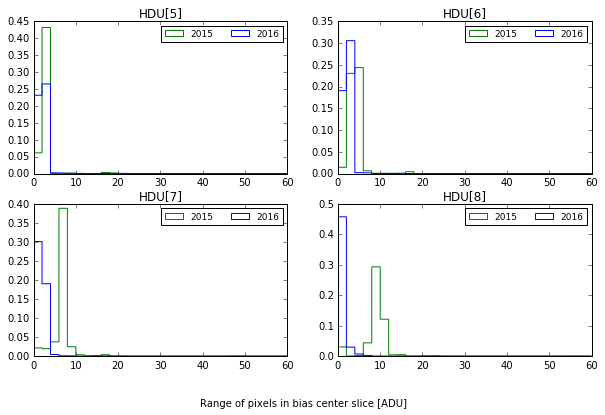

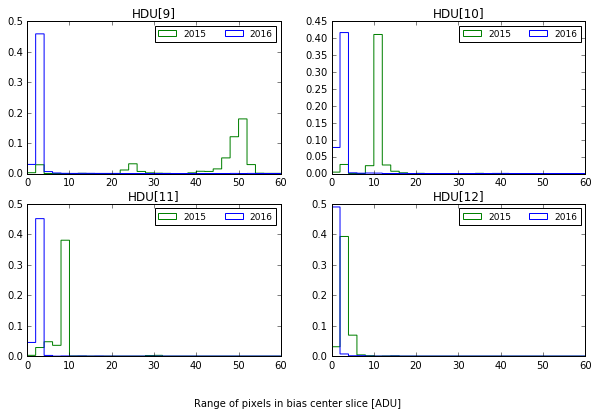

In [3]:
for ccdNum in [2,3]:
    exts = 4*(ccdNum-1) + arange(1,5)
    figure(figsize=(10,6))
    for pnum,ext in enumerate(exts,start=1):
        subplot(2,2,pnum)
        for t,lbl,clr in zip([t15,t16],#,s15[b15],s16[b16],s15[o15],s16[o16]],
                             ['2015','2016'],#,'2015b','2016b','2015o','2016o'],
                             'gbcrmk'):
            hist(t['sliceRangeAdu'][:,ext-1].compressed(),30,(0,60),normed=True,
                 histtype='step',label=lbl,color=clr)
        title('HDU[%d]'%ext)
        legend(loc='upper right',ncol=3,fontsize=9)
    figtext(0.5,0.01,'Range of pixels in bias center slice [ADU]',ha='center')

Joe F. found that the gradient features do still exist in 2016 biases, by visually inspecting all of the bias images. They are, however, at a very low frequency (few percent) and a much lower amplitude (~20 ADU for IM9):

In [4]:
def check_ext(t,ext,badval=None):
    j = ext-1
    print "MIN: ",t['sliceRangeAdu'][:,j].min()
    print "MAX: ",t['sliceRangeAdu'][:,j].max()
    m = sigma_clip(t['sliceRangeAdu'][:,j]).mean()
    s = sigma_clip(t['sliceRangeAdu'][:,j]).std()
    print "MEAN: ",m
    print "STD: ",s
    nbias = (~t['sliceRangeAdu'][:,j].mask).sum()
    if badval is None: badval = m+5*s
    bad = t['sliceRangeAdu'][:,j] > badval
    print "BAD: %d/%d = %.2f%%" % (sum(bad),nbias,100*float(sum(bad))/nbias)
    return where(bad.filled(False))[0]

In [5]:
# IM9
print '---- 2015 ----'
_ = check_ext(t15,9,badval=10)
#_ = check_ext(s15[b15],9,badval=10)
#_ = check_ext(s15[o15],9,badval=10)
print '---- 2016 ----'
ii = check_ext(t16,9)
#_ = check_ext(s16[b16],9)
#_ = check_ext(s16[o16],9)
# the offending biases
print t16['fileName'][ii]

---- 2015 ----
MIN:  1.54275
MAX:  63.1338
MEAN:  49.7230585887
STD:  1.91601486833
BAD: 913/973 = 93.83%
---- 2016 ----
MIN:  1.18199
MAX:  53.3476
MEAN:  2.67876093023
STD:  0.43351511999
BAD: 23/1760 = 1.31%
              fileName             
-----------------------------------
ksb_160105_014622_zri              
ksb_160105_014751_zri              
ksb_160111_232604_zri              
ksb_160111_232648_zri              
ksb_160205_014026_zri              
ksb_160205_014111_zri              
ksb_160205_014157_zri              
ksb_160205_014242_zri              
ksb_160206_135329_zri              
ksb_160208_232437_zri              
ksb_160310_005218_zri              
ksb_160310_005349_zri              
ksb_160313_004124_zri              
ksb_160428_010252_zri              
ksb_160504_020314_zri              
ksb_160504_020444_zri              
ksb_160507_015351_zri              
ksb_160507_015522_zri              
ksb_160512_014730_zri              
ksb_160512_014816_zri            

In [6]:
# IM5
print '---- 2015 ----'
ii = check_ext(t15,8,badval=10)
print '---- 2016 ----'
ii = check_ext(t16,8)
# the offending biases
print t16['fileName'][ii]

---- 2015 ----
MIN:  0.813925
MAX:  15.6547
MEAN:  9.80225101966
STD:  0.396434257328
BAD: 253/973 = 26.00%
---- 2016 ----
MIN:  0.571525
MAX:  56.5948
MEAN:  1.595465881
STD:  0.215529865075
BAD: 83/1761 = 4.71%
              fileName             
-----------------------------------
ksb_160105_014622_zri              
ksb_160105_014707_zri              
ksb_160105_014751_zri              
ksb_160105_014835_zri              
ksb_160105_014919_zri              
ksb_160105_015004_zri              
ksb_160109_000859_zri              
ksb_160109_001028_zri              
ksb_160109_001112_zri              
ksb_160109_001156_zri              
                                ...
ksb_160526_231511_zri              
ksb_160526_231556_zri              
ksb_160526_231641_zri              
ksb_160526_231726_zri              
ksb_160526_231812_zri              
ksb_160611_032739_zri              
ksb_160611_032909_zri              
ksb_160611_032954_zri              
ksb_160702_024059_zri          

## Bias roll-off

A "feature" where the bias counts drop considerably at the edge of the image. Only observed to occur during bias sequences. The frequency has dropped from ~27% to ~2%.

In [7]:
def count_rolloffs(t):
    nbias = (~t['dropFlag'].mask).sum(axis=0)
    froll = t['dropFlag'].sum(axis=0)/nbias.astype(float)
    return froll
f15 = count_rolloffs(t15)
f16 = count_rolloffs(t16)
f15b = count_rolloffs(s15[b15])
f16b = count_rolloffs(s16[b16])
f15o = count_rolloffs(s15[o15])
f16o = count_rolloffs(s16[o16])
#froll = Table([arange(1,17),f15,f16,f15b,f16b,f15o,f16o],
#              names=['hduNum','freq2015','freq2016','b15','b16','o15','o16'])
froll = Table([arange(1,17),f15,f16,f15o,f16o],
              names=['hduNum','freq2015(bias)','freq2016(bias)',
                     'freq2015(obj)','freq2016(obj)'])
for col in froll.itercols(): 
    if col.name != 'hduNum': 
        col.format='%.4f'
print(froll)

hduNum freq2015(bias) freq2016(bias) freq2015(obj) freq2016(obj)
------ -------------- -------------- ------------- -------------
     1         0.1342         0.0136        0.0003        0.0014
     2         0.1342         0.0096        0.0005        0.0015
     3         0.1332         0.0136        0.0002        0.0010
     4         0.1332         0.0141        0.0002        0.0014
     5         0.1332         0.0158        0.0006        0.0008
     6         0.1322         0.0147        0.0001        0.0006
     7         0.1322         0.0147        0.0008        0.0017
     8         0.1322         0.0158        0.0006        0.0019
     9         0.1373         0.0130        0.0003        0.0004
    10         0.1373         0.0113        0.0001        0.0008
    11         0.1373         0.0124        0.0006        0.0013
    12         0.1373         0.0136        0.0003        0.0010
    13         0.1373         0.0136        0.0001        0.0054
    14         0.1373    